Unsupervised learning is an ML technique that uses only the input to learn patterns in the data. Example applications include dimensionality reduction (especially for high dimensional data) and clustering (grouping together data that are similar). 

We take a dataset containing characteristics of various red wine datasets. 

In [2]:
import pandas as pd

df = pd.read_csv("winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We can analyze the statistics of the data set. 

In [6]:
round(df.describe(exclude = 'object'), 2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [9]:
# Everything but quality is a feature, so we are going to only work with these... 
df.drop(columns=['quality'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Here's the histogram of these features. 

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

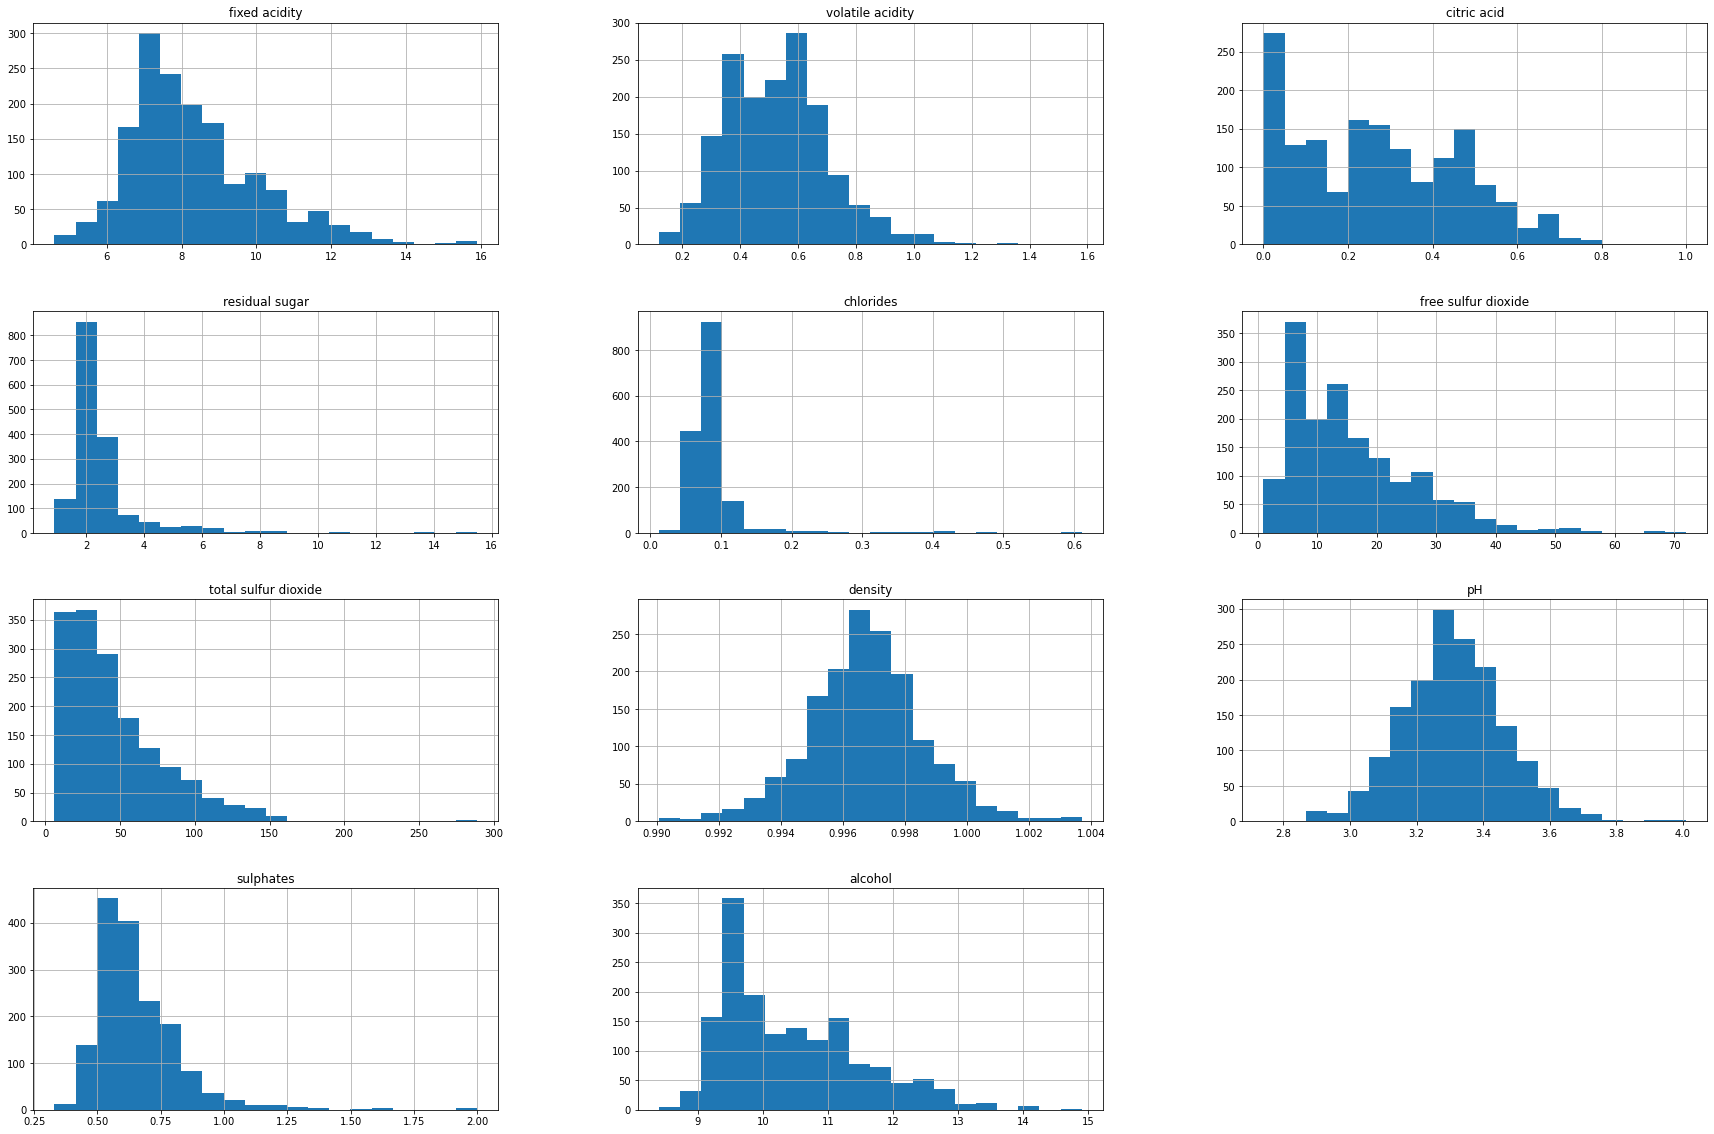

In [11]:
df[df.columns[0:11]].hist(bins=20, figsize=(30, 20))

Many of these features are correlated. You can compute this correlation metric and plot this as a heat map. 

In particular, we compute the Pearson's correlation coefficient. 

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [14]:
correlations = df.corr()

<AxesSubplot:>

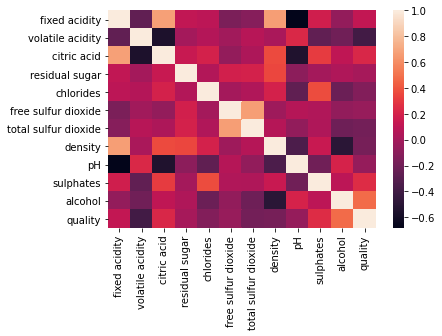

In [17]:
import seaborn as sns # We use this package that builds on matplotlib... 
import matplotlib.pyplot as plt

sns.heatmap(correlations)
#plt.show()

Let's consider an example of negatively and positively correlated features..

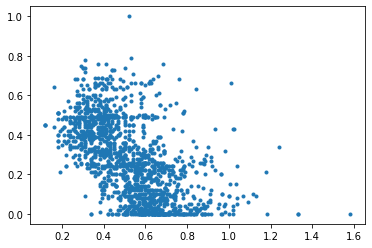

In [24]:
plt.plot(df['volatile acidity'], df['citric acid'], '.')

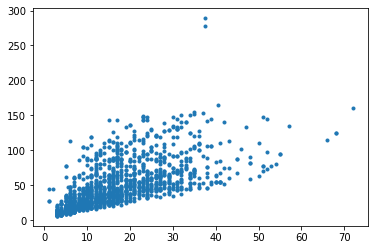

In [26]:
plt.plot(df['free sulfur dioxide'], df['total sulfur dioxide'], '.')

In [32]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We take the first 11 columns to get X and set the last column as Y. Then split the data into 75% training set and 25% testing set...

In [42]:
from sklearn.model_selection import train_test_split

X = df[df.columns[0:11]].values

Y = df['quality'].values



X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)


We consider Principal Component Analysis (PCA) first. This method is a dimensionality reduction technique that tries to find linear combination of the features that most captures the variance in the data (so called "explained variance")... 

PCA works by using the eigenvectors of the covariance matrix of the data to identify linear combinations. The eigenvectors of the covariance matrix identify the “natural” coordinate system of the data.

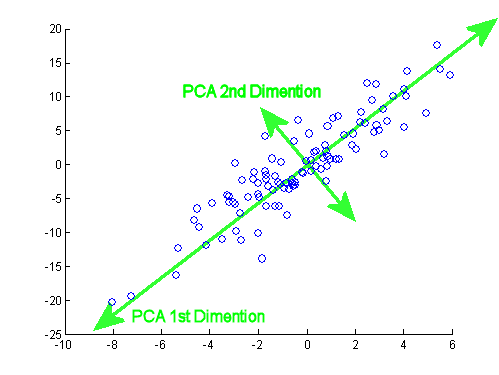



https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd

In [43]:
from sklearn.decomposition import PCA

# Default PCA object
pca = PCA()

# Fit the PCA and transform the data
components = pca.fit_transform(X_train)


In [44]:
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[9.41639253e-01 5.29188512e-02 2.77470211e-03 1.67233567e-03
 9.21060071e-04 3.53242723e-05 1.92083139e-05 9.52756955e-06
 8.71060371e-06 1.02690816e-06 4.73699504e-10]


The first two components captures most of the variance.. Plotted below are components 1 vs 2; components 3 vs 4..

In [54]:
components.shape

(1199, 11)

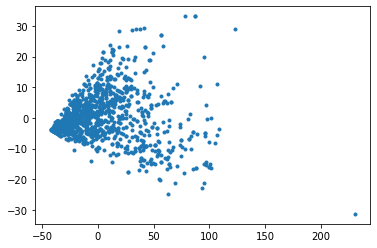

In [55]:
plt.plot(components[:,0], components[:, 1], '.')

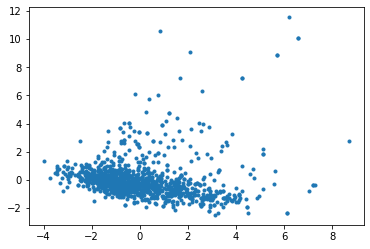

In [56]:
plt.plot(components[:,2], components[:,3], '.')

Another method is the t-SNE (t-distributed stochastic neighbor embedding) that identifies a smaller dimensional representation such that the relative distance between two points in the original space is preserved in the reduced dimensional space. 


If we compress the dimensions of this data to n (n much less than m), then the distance $D_{ij}$ in the n dimensions can be analogously computed. t-SNE tries to find n such that the stress of compression: $S = \frac{\sum_{i,j} (d_{ij} - D_{ij})^2}{\sum_{i,j} d_{ij}^2}$ is minimized... 

In [51]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Default TSNE object
tsne = TSNE(init="pca", n_iter=1000, verbose=2)

# Fit the TSNE and transform the data
tsne_components = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1199 samples in 0.009s...
[t-SNE] Computed neighbors for 1199 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1199
[t-SNE] Computed conditional probabilities for sample 1199 / 1199
[t-SNE] Mean sigma: 2.403967
[t-SNE] Computed conditional probabilities in 0.115s
[t-SNE] Iteration 50: error = 49.2008476, gradient norm = 0.1233372 (50 iterations in 1.029s)
[t-SNE] Iteration 100: error = 50.5795860, gradient norm = 0.1145431 (50 iterations in 0.977s)
[t-SNE] Iteration 150: error = 52.0366325, gradient norm = 0.0922383 (50 iterations in 0.726s)
[t-SNE] Iteration 200: error = 52.6251526, gradient norm = 0.0987499 (50 iterations in 0.891s)
[t-SNE] Iteration 250: error = 53.5298805, gradient norm = 0.1224020 (50 iterations in 0.852s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.529881
[t-SNE] Iteration 300: error = 0.6318523, gradient norm = 0.0010170 (50 iterations in 1.274s)

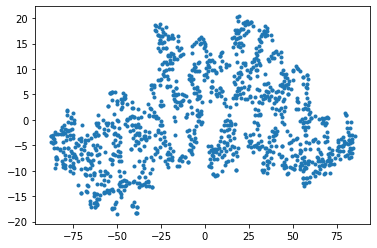

In [57]:
plt.plot(tsne_components[:,0], tsne_components[:, 1], '.')

In [59]:
tsne_components.shape

(1199, 2)

Sometimes, grouping data into different clusers can also be helpful to understand the distribution of the data. kMeans clustering is a popular method. See: https://scikit-learn.org/stable/modules/clustering.html#k-means

Below is code that computes kMeans clustering. Given the nature of the data (one or two components is sufficient to explain the data),clustering doesn't really work that well... nevertheless, this code is generally useful. 

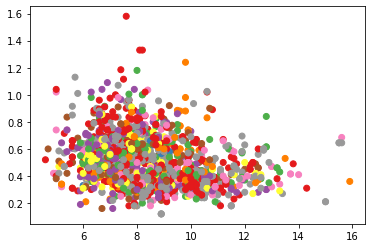

In [69]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(2, 2, figsize=(12, 12))



for i, k in enumerate(range(2, 6)):
    clustering = KMeans(k).fit(X)
    a = ax[0 if i < 2 else 1, i % 2]
    a.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="Set1")
    a.set_title("K = %d" % k)

Wine dataset is a poor example to do Kmeans cluterting because they all belong to one cluster hence the messy color.